In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn
from scipy.optimize import curve_fit, minimize
from scipy.stats import norm
import matplotlib.mlab as mlab

In [171]:
np.random.seed(100)

sizes = (np.ones((5,100))*np.random.randint(10, 2000, 100)).astype(int) #creates an array of sizes for each distribution (5 in total)

mymean = 100
normal = []
poisson = []
binomial = []
chi = []
uniform = []

for i in range(100):
    normal.append(np.random.randn(sizes[0,i])+ mymean)
    binomial.append(np.random.binomial(mymean/0.25,0.25,size=sizes[1,i]))
    poisson.append(np.random.poisson(lam=mymean,size=sizes[2,i]))
    chi.append(np.random.chisquare(mymean,size=sizes[3,i]))
    uniform.append(np.random.uniform(mymean*.5,mymean*1.5,size=sizes[4,i]))

In [165]:
def plot_me(distribution,title,subplot):
    for i in range(100):
        subplot.plot(distribution[i].size, distribution[i].mean(), '.')
    subplot.set_title(title, fontsize=15)
    subplot.set_xlabel('Sample Size', fontsize=10)
    subplot.set_ylabel('Sample Mean', fontsize=10)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


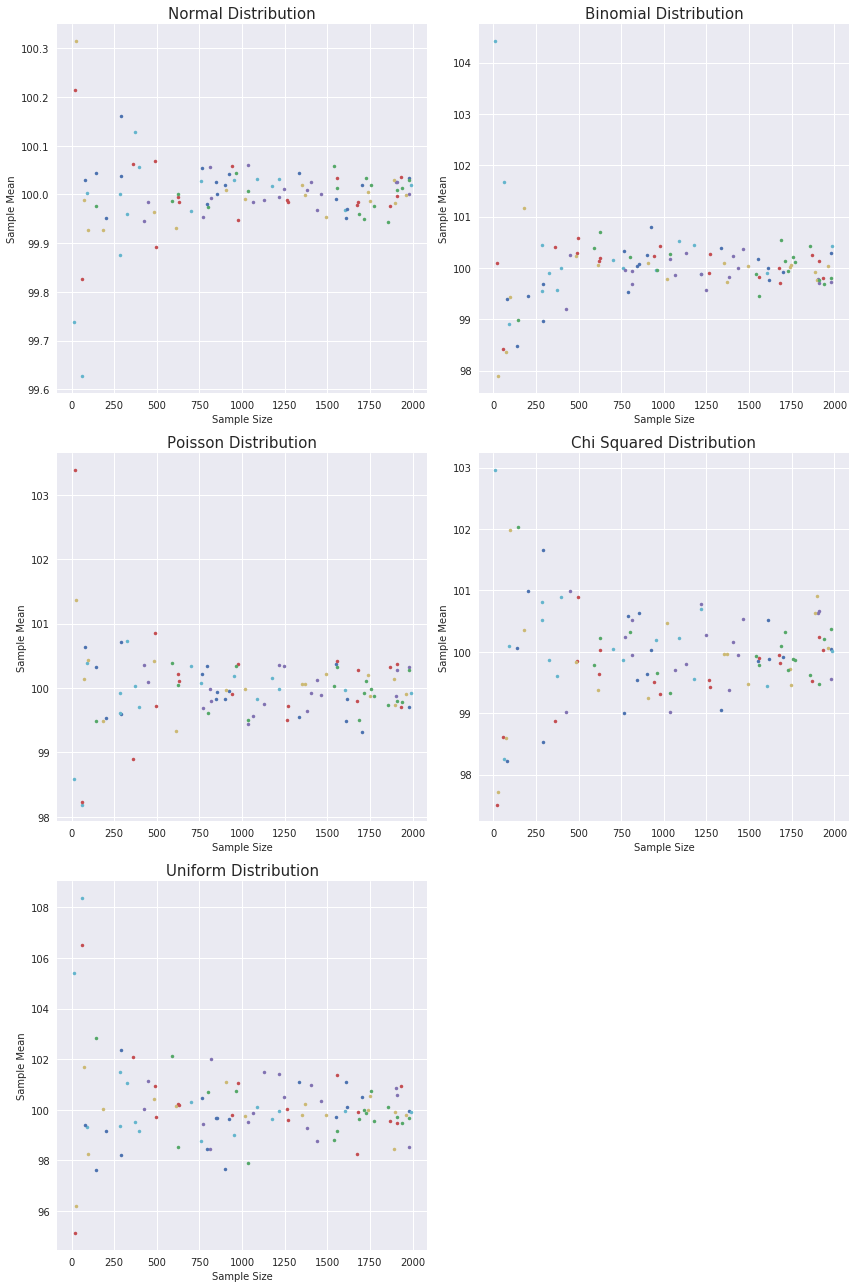

In [166]:
# Plot the sample mean (dependent variable) against the sample size N (independent variable)
fig = plt.figure(figsize=(12,18))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

plot_me(normal,'Normal Distribution',ax1)
plot_me(binomial, 'Binomial Distribution',ax2)
plot_me(poisson,'Poisson Distribution',ax3)
plot_me(chi, 'Chi Squared Distribution',ax4)
plot_me(uniform,'Uniform Distribution',ax5)

plt.tight_layout()

__Figure 1__: Sample Mean against Sample Size for each of the 5 distributions. Each plot shows a narrowing of sample means as the sample size increases. This supports the Central Limit Theorem

In [167]:
normal_means = []
binomial_means = []
chi_means = []
poisson_means = []
uniform_means = []

for i in range(len(normal)):
    normal_means.append(normal[i].mean())
    binomial_means.append(binomial[i].mean())
    chi_means.append(chi[i].mean())
    poisson_means.append(poisson[i].mean())
    uniform_means.append(uniform[i].mean())

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


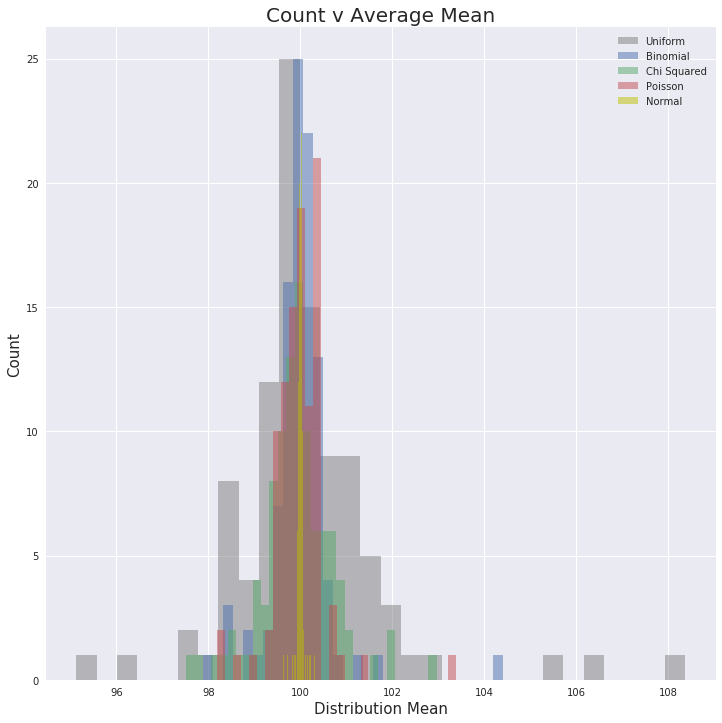

In [168]:
# Plot the distributions of all sample means (together for all distributions) as a histogram
plt.figure(figsize=(12,12))
plt.hist(uniform_means,bins=30,alpha=0.5, label='Uniform', color='grey')
plt.hist(binomial_means, bins=30, alpha=0.5, label='Binomial')
plt.hist(chi_means, bins=30, alpha=0.5, label='Chi Squared')
plt.hist(poisson_means,bins=30,alpha=0.5, label='Poisson')
plt.hist(normal_means,bins=30,alpha=0.5, label='Normal', color='y')
# plt.hist(all_means,bins=100,alpha=0.5, color='y')
plt.xlabel('Distribution Mean', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count v Average Mean', fontsize=20)
plt.legend()

**Figure 3**: Distribution means plotted on top of each other (for combined histogram, see figure below). All distributions are normally distributed with an average mean of ~100. Note that the variance varies widely from one to the next

## EC: FIT a gaussian to the distribution of means

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


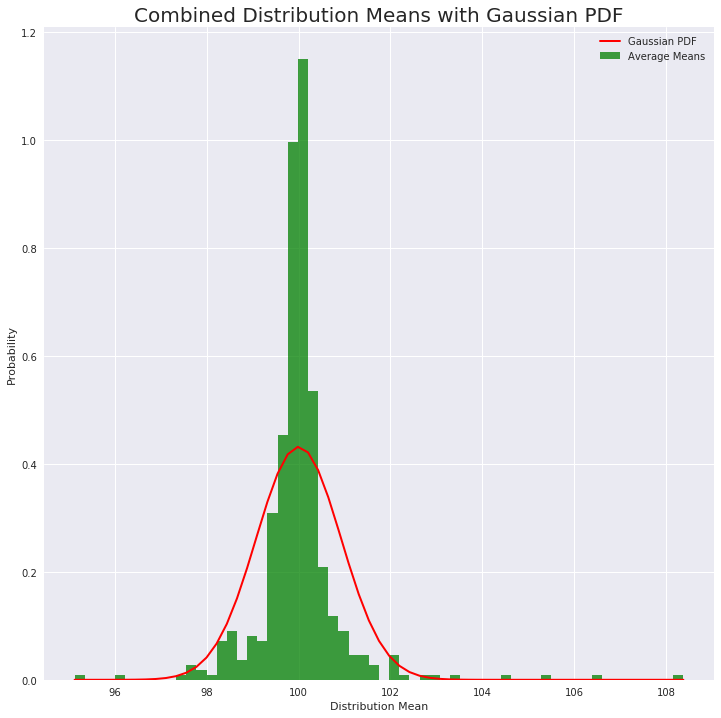

In [173]:
plt.figure(figsize=(12,12))
all_means = normal_means + binomial_means + uniform_means + poisson_means + chi_means
(mu, sigma) = norm.fit(all_means)
n, bins, patches = plt.hist(all_means, 60, density=True, stacked=True, facecolor='green', alpha=0.75, label='Average Means')
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins,y,'r', linewidth=2, label='Gaussian PDF')
plt.title('Combined Distribution Means with Gaussian PDF', fontsize=20)
plt.ylabel('Probability')
plt.xlabel('Distribution Mean')
plt.legend()
plt.show()

**Figure 4:** Combining all distribution means and fitting a gaussian curve over the top